In [2]:
# 인구 조사 자료를 바탕으로 소득이 $ 50,000 / 년을 초과하는지 예측합니다
import pandas as pd
import numpy as np
import seaborn as sns
names=['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','target']
df_adult = pd.read_csv('adult.data.csv',names=names)
df_adult.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- age:                나이
- workclass:          노동 계급 
- fnlwgt:             ??
- education:          교육
- education-num:      교육 수
- marital-status:     결혼 상태
- occupation:         직업
- relationship:       가족내에서 관계
- race:               인종
- sex:                성별
- capital-gain:       자본이득 
- capital-loss:       자본손실
- hours-per-week:     주당 근로시간
- native-country:     출신 국가


In [3]:
df_adult.shape  # 데이터 모양 파악

(32561, 15)

In [4]:
df_adult.info() # 데이터 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#5만 달러 넘는 비율 찾기
print(df_adult['target'].value_counts())   

print()
print("%.2f" %(7841/32561*100))
# 5만 달러 넘는 비율

 <=50K    24720
 >50K      7841
Name: target, dtype: int64

24.08


In [6]:
# replace()로 데이터 값 중에 ? 값 => nan 으로 바꿔주기
df_adult.replace(' ?',np.nan, inplace=True)
df_adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [7]:
# dropna() 로 nan 값 없애주기
df_adult=df_adult.dropna(axis=0)
df_adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [8]:
# 인덱스를 새로 배정
df_adult=df_adult.reset_index(inplace=False,drop=True)
df_adult.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df_adult.shape

(30162, 15)

In [10]:
# fnlwgt 컬럼은 필요없다고 판단하여 제거
# marital-status, relationship 별로 상관업는 거 같은데 영향력이 커서   제거하고 해보기로함.

df_adult.drop(['fnlwgt','marital-status','relationship'],axis=1,inplace=True)
df_adult.shape



(30162, 12)

In [11]:
# 레이블 인코더 사용해서 문자열=> 숫자
from sklearn.preprocessing import LabelEncoder

col=names=['workclass','education','occupation',  'race', 'sex', 'native-country','target']
le=LabelEncoder()
for k in col:
    df_adult[k]=le.fit_transform(df_adult[k])


df_adult.head()


,age,workclass,education,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,5,9,13,0,4,1,2174,0,40,38,0
1,50,4,9,13,3,4,1,0,0,13,38,0
2,38,2,11,9,5,4,1,0,0,40,38,0
3,53,2,1,7,5,2,1,0,0,40,38,0
4,28,2,9,13,9,2,0,0,0,40,4,0


In [12]:
# 데이터 비율 맞춰주기 위해  StandardScaler 적용
from sklearn.preprocessing import StandardScaler
Xdf=df_adult.loc[:,'age':'native-country']
ydf=df_adult.loc[:,'target']

scaler = StandardScaler()
scaler.fit(Xdf)
adult_scaled = scaler.transform(Xdf)

In [13]:
names=['age','workclass',  'education', 'education-num', 'occupation',  'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
df_adult=pd.DataFrame(data=adult_scaled,columns=names)
df_adult.head()

,age,workclass,education,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.042796,2.936000,-0.349865,1.128918,-1.479055,0.385048,0.692806,0.146092,-0.218586,-0.077734,0.264924
1,0.880288,1.887682,-0.349865,1.128918,-0.734545,0.385048,0.692806,-0.147445,-0.218586,-2.331531,0.264924
2,-0.033340,-0.208955,0.174763,-0.439738,-0.238206,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.264924
3,1.108695,-0.208955,-2.448375,-1.224066,-0.238206,-2.011035,0.692806,-0.147445,-0.218586,-0.077734,0.264924
4,-0.794697,-0.208955,-0.349865,1.128918,0.754473,-2.011035,-1.443405,-0.147445,-0.218586,-0.077734,-5.304034


In [14]:
df_adult['target']=ydf
df_adult.head()

,age,workclass,education,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0.042796,2.936000,-0.349865,1.128918,-1.479055,0.385048,0.692806,0.146092,-0.218586,-0.077734,0.264924,0
1,0.880288,1.887682,-0.349865,1.128918,-0.734545,0.385048,0.692806,-0.147445,-0.218586,-2.331531,0.264924,0
2,-0.033340,-0.208955,0.174763,-0.439738,-0.238206,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.264924,0
3,1.108695,-0.208955,-2.448375,-1.224066,-0.238206,-2.011035,0.692806,-0.147445,-0.218586,-0.077734,0.264924,0
4,-0.794697,-0.208955,-0.349865,1.128918,0.754473,-2.011035,-1.443405,-0.147445,-0.218586,-0.077734,-5.304034,0


In [15]:
X=df_adult.loc[:,'age':'native-country']
y=df_adult.loc[:,'target']


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 배웠던 평가지표를 구현하는 함수
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [18]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_test, y_test)))
print()
pred=clf.predict(X_test)
get_clf_eval(y_test , pred)


훈련 세트 정확도: 0.841
테스트 세트 정확도: 0.809

오차 행렬
[[5187  452]
 [ 990  912]]
정확도: 0.8088, 정밀도: 0.6686, 재현율: 0.4795,    F1: 0.5585, AUC:0.6997


In [19]:
#SVM
from sklearn import svm
clf=svm.SVC(gamma=0.01,C=50.)
clf.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_test, y_test)))

print()
pred=clf.predict(X_test)
get_clf_eval(y_test , pred)

훈련 세트 정확도: 0.831
테스트 세트 정확도: 0.821

오차 행렬
[[5369  270]
 [1079  823]]
정확도: 0.8211, 정밀도: 0.7530, 재현율: 0.4327,    F1: 0.5496, AUC:0.6924


In [20]:
#로지스틱 회귀
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.1,max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(clf.score(X_test, y_test)))

print()
pred=clf.predict(X_test)
get_clf_eval(y_test , pred)

훈련 세트 점수: 0.821
테스트 세트 점수: 0.812

오차 행렬
[[5306  333]
 [1086  816]]
정확도: 0.8118, 정밀도: 0.7102, 재현율: 0.4290,    F1: 0.5349, AUC:0.6850


In [21]:
#결정트리분류기
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(max_depth=8)
clf.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_test, y_test)))
print()
pred=clf.predict(X_test)
get_clf_eval(y_test , pred)

훈련 세트 정확도: 0.845
테스트 세트 정확도: 0.831

오차 행렬
[[5412  227]
 [1048  854]]
정확도: 0.8309, 정밀도: 0.7900, 재현율: 0.4490,    F1: 0.5726, AUC:0.7044


Feature importances:
[0.178 0.002 0.001 0.219 0.006 0.002 0.087 0.365 0.098 0.041 0.001]
age : 0.178
workclass : 0.002
education : 0.001
education-num : 0.219
occupation : 0.006
race : 0.002
sex : 0.087
capital-gain : 0.365
capital-loss : 0.098
hours-per-week : 0.041
native-country : 0.001


<AxesSubplot:>

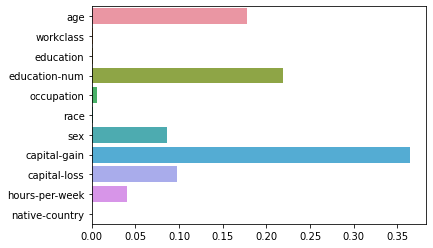

In [22]:
import seaborn as sns
import numpy as np
%matplotlib inline
# feature importance 추출
print("Feature importances:\n{0}".format(np.round(clf.feature_importances_,
3)))
# feature별 importance 매핑
for name, value in zip(names , clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
# feature importance를 column 별로 시각화 하기
sns.barplot(x=clf.feature_importances_ , y=names)

In [23]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# 최적의 파라메타 찾기 GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,300],
    'max_depth' : [10, 12,14,16], 
    'min_samples_leaf' : [4, 6, 8,10],
    'min_samples_split' : [8,10,12,14]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
최고 예측 정확도: 0.8421


In [41]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300)
clf.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_test, y_test)))
print()
pred=clf.predict(X_test)
get_clf_eval(y_test , pred)


훈련 세트 정확도: 0.849
테스트 세트 정확도: 0.836

오차 행렬
[[5394  245]
 [ 995  907]]
정확도: 0.8356, 정밀도: 0.7873, 재현율: 0.4769,    F1: 0.5940, AUC:0.7167


Feature importances:
[0.181 0.014 0.033 0.201 0.04  0.006 0.081 0.272 0.08  0.089 0.004]
age : 0.181
workclass : 0.014
education : 0.033
education-num : 0.201
occupation : 0.040
race : 0.006
sex : 0.081
capital-gain : 0.272
capital-loss : 0.080
hours-per-week : 0.089
native-country : 0.004


<AxesSubplot:>

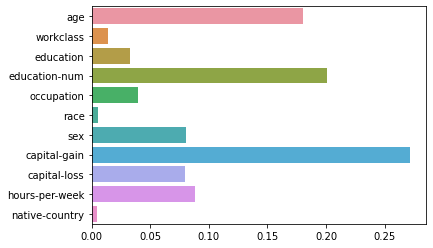

In [42]:
import seaborn as sns
import numpy as np
%matplotlib inline
# feature importance 추출
print("Feature importances:\n{0}".format(np.round(clf.feature_importances_,
3)))
# feature별 importance 매핑
for name, value in zip(names , clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
# feature importance를 column 별로 시각화 하기
sns.barplot(x=clf.feature_importances_ , y=names)

In [26]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier()
clf.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_test, y_test)))
print()
pred=clf.predict(X_test)
get_clf_eval(y_test , pred)

훈련 세트 정확도: 0.846
테스트 세트 정확도: 0.837

오차 행렬
[[5323  316]
 [ 911  991]]
정확도: 0.8373, 정밀도: 0.7582, 재현율: 0.5210,    F1: 0.6176, AUC:0.7325


In [27]:
#GBM
from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1)
clf.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_test, y_test)))
print()
pred=clf.predict(X_test)
get_clf_eval(y_test , pred)

훈련 세트 정확도: 0.867
테스트 세트 정확도: 0.847

오차 행렬
[[5338  301]
 [ 851 1051]]
정확도: 0.8472, 정밀도: 0.7774, 재현율: 0.5526,    F1: 0.6460, AUC:0.7496


In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'e:\모든파일\프로그래밍\파이썬\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [29]:
#XGB
import xgboost as xgb
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)
w_preds = xgb_wrapper.predict(X_test)

e:\모든파일\프로그래밍\파이썬\venv\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.64996
[1]	validation_0-logloss:0.61476
[2]	validation_0-logloss:0.58558
[3]	validation_0-logloss:0.56124
[4]	validation_0-logloss:0.54033
[5]	validation_0-logloss:0.52272
[6]	validation_0-logloss:0.50743
[7]	validation_0-logloss:0.49361
[8]	validation_0-logloss:0.48197
[9]	validation_0-logloss:0.47088
[10]	validation_0-logloss:0.46156
[11]	validation_0-logloss:0.45375
[12]	validation_0-logloss:0.44566
[13]	validation_0-logloss:0.43935
[14]	validation_0-logloss:0.43309
[15]	validation_0-logloss:0.42786
[16]	validation_0-logloss:0.42293
[17]	validation_0-logloss:0.41887
[18]	validation_0-logloss:0.41510
[19]	validation_0-logloss:0.41167
[20]	validation_0-logloss:0.40824
[21]	validation_0-logloss:0.40531
[22]	validation_0-logloss:0.40268
[23]	validation_0-logloss:0.40010
[24]	validation_0-logloss:0.39799
[25]	validation_0-logloss:0.39589
[26]	validation_0-logloss:0.39386
[27]	validation_0-logloss:0.39186
[28]	validation_0-logloss:0.38984
[29]	validation_0-loglos

[238]	validation_0-logloss:0.33714
[239]	validation_0-logloss:0.33707
[240]	validation_0-logloss:0.33708
[241]	validation_0-logloss:0.33707
[242]	validation_0-logloss:0.33703
[243]	validation_0-logloss:0.33704
[244]	validation_0-logloss:0.33696
[245]	validation_0-logloss:0.33697
[246]	validation_0-logloss:0.33697
[247]	validation_0-logloss:0.33697
[248]	validation_0-logloss:0.33695
[249]	validation_0-logloss:0.33692
[250]	validation_0-logloss:0.33685
[251]	validation_0-logloss:0.33685
[252]	validation_0-logloss:0.33674
[253]	validation_0-logloss:0.33674
[254]	validation_0-logloss:0.33667
[255]	validation_0-logloss:0.33662
[256]	validation_0-logloss:0.33664
[257]	validation_0-logloss:0.33664
[258]	validation_0-logloss:0.33654
[259]	validation_0-logloss:0.33646
[260]	validation_0-logloss:0.33638
[261]	validation_0-logloss:0.33637
[262]	validation_0-logloss:0.33636
[263]	validation_0-logloss:0.33632
[264]	validation_0-logloss:0.33630
[265]	validation_0-logloss:0.33626
[266]	validation_0-l

In [30]:
get_clf_eval(y_test , w_preds)

오차 행렬
[[5336  303]
 [ 862 1040]]
정확도: 0.8455, 정밀도: 0.7744, 재현율: 0.5468,    F1: 0.6410, AUC:0.7465


In [31]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,300],
    'max_depth' : [3,5, 7,9], 
    'min_child_weight' : [1,3,5],
    'colsample_bytree' : [0.5,0.75],
    'learning_rete':[0.01,0.1]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
clf = XGBClassifier()
grid_cv = GridSearchCV(clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train, early_stopping_rounds=30,eval_set=evals, eval_metric="logloss",  verbose=True)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


[17:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rete } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.59006
[1]	validation_0-logloss:0.52914
[2]	validation_0-logloss:0.47338
[3]	validation_0-logloss:0.45149
[4]	validation_0-logloss:0.42620
[5]	validation_0-logloss:0.40571
[6]	validation_0-logloss:0.39161
[7]	validation_0-logloss:0.38425
[8]	validation_0-logloss:0.37777
[9]	validation_0-logloss:0.37297
[10]	validation_0-logloss:0.36728
[11]	validation_0-logloss:0.36463
[12]	validation_0-logloss:0.36207
[13]	validation_0-logloss:0.35855
[14]	validation_0-logloss:0.35616
[15]	validation_0-logloss:0.35459
[16]	validation_0-logloss:0.35162
[17]	validation_0-logloss:0.35103
[18]	va

e:\모든파일\프로그래밍\파이썬\venv\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.34109
[30]	validation_0-logloss:0.34088
[31]	validation_0-logloss:0.34019
[32]	validation_0-logloss:0.34014
[33]	validation_0-logloss:0.33976
[34]	validation_0-logloss:0.33954
[35]	validation_0-logloss:0.33948
[36]	validation_0-logloss:0.33939
[37]	validation_0-logloss:0.33906
[38]	validation_0-logloss:0.33847
[39]	validation_0-logloss:0.33827
[40]	validation_0-logloss:0.33721
[41]	validation_0-logloss:0.33723
[42]	validation_0-logloss:0.33706
[43]	validation_0-logloss:0.33675
[44]	validation_0-logloss:0.33626
[45]	validation_0-logloss:0.33591
[46]	validation_0-logloss:0.33561
[47]	validation_0-logloss:0.33563
[48]	validation_0-logloss:0.33533
[49]	validation_0-logloss:0.33504
[50]	validation_0-logloss:0.33500
[51]	validation_0-logloss:0.33506
[52]	validation_0-logloss:0.33465
[53]	validation_0-logloss:0.33452
[54]	validation_0-logloss:0.33443
[55]	validation_0-logloss:0.33447
[56]	validation_0-logloss:0.33442
[57]	validation_0-logloss:0.33456
[58]	validatio

In [32]:
pip install lightgbm

You should consider upgrading via the 'e:\모든파일\프로그래밍\파이썬\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [33]:
#light GBM
from lightgbm import LGBMClassifier
# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.530183
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.504188
[3]	valid_0's binary_logloss: 0.483647
[4]	valid_0's binary_logloss: 0.46682
[5]	valid_0's binary_logloss: 0.45286
[6]	valid_0's binary_logloss: 0.441107
[7]	valid_0's binary_logloss: 0.430478
[8]	valid_0's binary_logloss: 0.421791
[9]	valid_0's binary_logloss: 0.414182
[10]	valid_0's binary_logloss: 0.407621
[11]	valid_0's binary_logloss: 0.401764
[12]	valid_0's binary_logloss: 0.39584
[13]	valid_0's binary_logloss: 0.391079
[14]	valid_0's binary_logloss: 0.386677
[15]	valid_0's binary_logloss: 0.382843
[16]	valid_0's binary_logloss: 0.379507
[17]	valid_0's binary_logloss: 0.376336
[18]	valid_0's binary_logloss: 0.373065
[19]	valid_0's binary_logloss: 0.370454
[20]	valid_0's binary_logloss: 0.367871
[21]	valid_0's binary_logloss: 0.365674
[22]	valid_0's binary_logloss: 0.363035
[23]	valid_0's binary_logloss: 0.361394
[24]	valid_0's binary_logloss:

[218]	valid_0's binary_logloss: 0.335539
[219]	valid_0's binary_logloss: 0.335466
[220]	valid_0's binary_logloss: 0.33547
[221]	valid_0's binary_logloss: 0.335558
[222]	valid_0's binary_logloss: 0.335619
Early stopping, best iteration is:
[122]	valid_0's binary_logloss: 0.332669


In [34]:
get_clf_eval(y_test, preds)

오차 행렬
[[5324  315]
 [ 825 1077]]
정확도: 0.8488, 정밀도: 0.7737, 재현율: 0.5662,    F1: 0.6539, AUC:0.7552


In [35]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,300],
    'max_depth' : [3,5, 7,9], 
    'min_child_weight' : [1,3,5],
    'colsample_bytree' : [0.5,0.75]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
clf = LGBMClassifier()
grid_cv = GridSearchCV(clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train, early_stopping_rounds=30,eval_set=evals, eval_metric="logloss",  verbose=True)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


[1]	valid_0's binary_logloss: 0.545516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's binary_logloss: 0.530521
[3]	valid_0's binary_logloss: 0.517518
[4]	valid_0's binary_logloss: 0.505974
[5]	valid_0's binary_logloss: 0.497102
[6]	valid_0's binary_logloss: 0.491693
[7]	valid_0's binary_logloss: 0.480476
[8]	valid_0's binary_logloss: 0.471418
[9]	valid_0's binary_logloss: 0.461689
[10]	valid_0's binary_logloss: 0.452
[11]	valid_0's binary_logloss: 0.446954
[12]	valid_0's binary_logloss: 0.439527
[13]	valid_0's binary_logloss: 0.433856
[14]	valid_0's binary_logloss: 0.429156
[15]	valid_0's binary_logloss: 0.42567
[16]	valid_0's binary_logloss: 0.421581
[17]	valid_0's binary_logloss: 0.416668
[18]	valid_0's binary_logloss: 0.413651
[19]	valid_0's binary_logloss: 0.409855
[20]	valid_0's binary_logloss: 0.40667
[21]	valid_0's binary_logloss: 0.403797
[22]	valid_0's binary_logloss: 0.401955
[23]	valid_0's binary_logloss: 0.399542
[24]	valid_0's binary_logloss: 0.

[202]	valid_0's binary_logloss: 0.339293
[203]	valid_0's binary_logloss: 0.339241
[204]	valid_0's binary_logloss: 0.339267
[205]	valid_0's binary_logloss: 0.339167
[206]	valid_0's binary_logloss: 0.339154
[207]	valid_0's binary_logloss: 0.339053
[208]	valid_0's binary_logloss: 0.339093
[209]	valid_0's binary_logloss: 0.339076
[210]	valid_0's binary_logloss: 0.339037
[211]	valid_0's binary_logloss: 0.338974
[212]	valid_0's binary_logloss: 0.338926
[213]	valid_0's binary_logloss: 0.338833
[214]	valid_0's binary_logloss: 0.338813
[215]	valid_0's binary_logloss: 0.338776
[216]	valid_0's binary_logloss: 0.33865
[217]	valid_0's binary_logloss: 0.338626
[218]	valid_0's binary_logloss: 0.338546
[219]	valid_0's binary_logloss: 0.338297
[220]	valid_0's binary_logloss: 0.338318
[221]	valid_0's binary_logloss: 0.33829
[222]	valid_0's binary_logloss: 0.338311
[223]	valid_0's binary_logloss: 0.338264
[224]	valid_0's binary_logloss: 0.338157
[225]	valid_0's binary_logloss: 0.338132
[226]	valid_0's bi

In [37]:
pip install tensorflow

You should consider upgrading via the 'e:\모든파일\프로그래밍\파이썬\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [38]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'e:\모든파일\프로그래밍\파이썬\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [39]:
# 딥러닝코드

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(0)
tf.random.set_seed(0)

In [40]:
from keras.callbacks import EarlyStopping

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
model = Sequential()
model.add(Dense(30, input_dim=11, activation='relu'))
model.add(Dense(12,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 딥러닝을 실행합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)

model.fit(X_train, y_train, epochs=1000, batch_size=100)

# print('\n Accuracy: %.4f' %(model.evaluate(X_test,y_test)[1]))

Epoch 1/1000
227/227 [==============================] - 1s 3ms/step - loss: 0.4846 - accuracy: 0.7706
Epoch 2/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8226
Epoch 3/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8275
Epoch 4/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8273
Epoch 5/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8286
Epoch 6/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8288
Epoch 7/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8302
Epoch 8/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8300
Epoch 9/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8300
Epoch 10/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.372

227/227 [==============================] - 0s 810us/step - loss: 0.3500 - accuracy: 0.8406
Epoch 80/1000
227/227 [==============================] - 0s 784us/step - loss: 0.3501 - accuracy: 0.8404
Epoch 81/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8391
Epoch 82/1000
227/227 [==============================] - 1s 3ms/step - loss: 0.3499 - accuracy: 0.8403
Epoch 83/1000
227/227 [==============================] - 1s 3ms/step - loss: 0.3500 - accuracy: 0.8405: 0s - loss: 0
Epoch 84/1000
227/227 [==============================] - 1s 3ms/step - loss: 0.3494 - accuracy: 0.8400: 0s - loss:
Epoch 85/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8405
Epoch 86/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8406
Epoch 87/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8395
Epoch 88/1000
227/227 [==============================] - 

227/227 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8429
Epoch 158/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8441
Epoch 159/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8439
Epoch 160/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8428
Epoch 161/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8434
Epoch 162/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8429
Epoch 163/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8432
Epoch 164/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8435
Epoch 165/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8434
Epoch 166/1000
227/227 [==============================] - 0s 1ms/step - loss: 0

227/227 [==============================] - 0s 837us/step - loss: 0.3392 - accuracy: 0.8444
Epoch 236/1000
227/227 [==============================] - 0s 819us/step - loss: 0.3390 - accuracy: 0.8457
Epoch 237/1000
227/227 [==============================] - 0s 775us/step - loss: 0.3393 - accuracy: 0.8436
Epoch 238/1000
227/227 [==============================] - 0s 753us/step - loss: 0.3393 - accuracy: 0.8441
Epoch 239/1000
227/227 [==============================] - 0s 748us/step - loss: 0.3391 - accuracy: 0.8443
Epoch 240/1000
227/227 [==============================] - 0s 767us/step - loss: 0.3391 - accuracy: 0.8442
Epoch 241/1000
227/227 [==============================] - 0s 756us/step - loss: 0.3399 - accuracy: 0.8448
Epoch 242/1000
227/227 [==============================] - 0s 753us/step - loss: 0.3389 - accuracy: 0.8456
Epoch 243/1000
227/227 [==============================] - 0s 823us/step - loss: 0.3390 - accuracy: 0.8445
Epoch 244/1000
227/227 [==============================] - 0s 

227/227 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8453
Epoch 314/1000
227/227 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8461
Epoch 315/1000
227/227 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8463
Epoch 316/1000
227/227 [==============================] - 1s 2ms/step - loss: 0.3357 - accuracy: 0.8461: 0s - loss: 0.3298 - 
Epoch 317/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8470
Epoch 318/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8469
Epoch 319/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8480
Epoch 320/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8462
Epoch 321/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8461
Epoch 322/1000
227/227 [==============================] -

227/227 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8481
Epoch 392/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8484
Epoch 393/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8478
Epoch 394/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8482
Epoch 395/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8477
Epoch 396/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8468
Epoch 397/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8473
Epoch 398/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8479
Epoch 399/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8479
Epoch 400/1000
227/227 [==============================] - 0s 2ms/step - loss: 0

227/227 [==============================] - 0s 911us/step - loss: 0.3325 - accuracy: 0.8476
Epoch 470/1000
227/227 [==============================] - 0s 841us/step - loss: 0.3312 - accuracy: 0.8493
Epoch 471/1000
227/227 [==============================] - 0s 837us/step - loss: 0.3318 - accuracy: 0.8485
Epoch 472/1000
227/227 [==============================] - 0s 876us/step - loss: 0.3312 - accuracy: 0.8496
Epoch 473/1000
227/227 [==============================] - 0s 977us/step - loss: 0.3321 - accuracy: 0.8487
Epoch 474/1000
227/227 [==============================] - 0s 845us/step - loss: 0.3317 - accuracy: 0.8486
Epoch 475/1000
227/227 [==============================] - 0s 920us/step - loss: 0.3314 - accuracy: 0.8485
Epoch 476/1000
227/227 [==============================] - 0s 889us/step - loss: 0.3312 - accuracy: 0.8484
Epoch 477/1000
227/227 [==============================] - 0s 889us/step - loss: 0.3324 - accuracy: 0.8476
Epoch 478/1000
227/227 [==============================] - 0s 

227/227 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8475
Epoch 548/1000
227/227 [==============================] - 1s 3ms/step - loss: 0.3308 - accuracy: 0.8492
Epoch 549/1000
227/227 [==============================] - 1s 3ms/step - loss: 0.3300 - accuracy: 0.8499
Epoch 550/1000
227/227 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8493
Epoch 551/1000
227/227 [==============================] - 1s 2ms/step - loss: 0.3304 - accuracy: 0.8495
Epoch 552/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8488
Epoch 553/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8485
Epoch 554/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8502
Epoch 555/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8489
Epoch 556/1000
227/227 [==============================] - 0s 1ms/step - loss: 0

227/227 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8503
Epoch 626/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8481
Epoch 627/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8492
Epoch 628/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8503
Epoch 629/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8487
Epoch 630/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8501
Epoch 631/1000
227/227 [==============================] - 0s 903us/step - loss: 0.3298 - accuracy: 0.8486
Epoch 632/1000
227/227 [==============================] - 0s 929us/step - loss: 0.3303 - accuracy: 0.8492
Epoch 633/1000
227/227 [==============================] - 0s 911us/step - loss: 0.3291 - accuracy: 0.8499
Epoch 634/1000
227/227 [==============================] - 1s 3ms/step - l

227/227 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8516
Epoch 704/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8488
Epoch 705/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8493
Epoch 706/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8485
Epoch 707/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8494
Epoch 708/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8497
Epoch 709/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8492
Epoch 710/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8489
Epoch 711/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8497
Epoch 712/1000
227/227 [==============================] - 0s 999us/step - loss:

227/227 [==============================] - 0s 995us/step - loss: 0.3279 - accuracy: 0.8492
Epoch 782/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8488
Epoch 783/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8487: 0s - loss: 0.3174 - accura
Epoch 784/1000
227/227 [==============================] - 0s 986us/step - loss: 0.3284 - accuracy: 0.8502
Epoch 785/1000
227/227 [==============================] - 0s 986us/step - loss: 0.3281 - accuracy: 0.8494
Epoch 786/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8504
Epoch 787/1000
227/227 [==============================] - 0s 954us/step - loss: 0.3285 - accuracy: 0.8488
Epoch 788/1000
227/227 [==============================] - 0s 907us/step - loss: 0.3285 - accuracy: 0.8497
Epoch 789/1000
227/227 [==============================] - 0s 837us/step - loss: 0.3285 - accuracy: 0.8490
Epoch 790/1000
227/227 [===============

227/227 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8501
Epoch 860/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8485
Epoch 861/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3270 - accuracy: 0.8501
Epoch 862/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8498
Epoch 863/1000
227/227 [==============================] - 0s 848us/step - loss: 0.3276 - accuracy: 0.8513
Epoch 864/1000
227/227 [==============================] - 0s 837us/step - loss: 0.3277 - accuracy: 0.8494
Epoch 865/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8494
Epoch 866/1000
227/227 [==============================] - 1s 3ms/step - loss: 0.3273 - accuracy: 0.8500
Epoch 867/1000
227/227 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.8494
Epoch 868/1000
227/227 [==============================] - 1s 2ms/step - los

Epoch 937/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8501: 0s - loss: 0.3343 - accura
Epoch 938/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8509
Epoch 939/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8497
Epoch 940/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8506
Epoch 941/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8497
Epoch 942/1000
227/227 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8513
Epoch 943/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8496
Epoch 944/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3261 - accuracy: 0.8494
Epoch 945/1000
227/227 [==============================] - 0s 1ms/step - loss: 0.3270 - accuracy: 0.8497
Epoch 946/1000
227/227 [============

In [43]:
a=pd.read_csv('4.csv')
a

,모델,정확도,정밀도,재현율,F1 score,AUC
0,딥러닝,0.8504,NaN,NaN,NaN,NaN
1,LGBM,0.8488,0.7737,0.5662,0.6539,0.7552
2,GBM,0.8472,0.7774,0.5526,0.6460,0.7496
3,XGB,0.8455,0.7744,0.5468,0.6410,0.7465
4,ada부스트,0.8373,0.7582,0.5210,0.6176,0.7325
5,랜덤포레스트,0.8356,0.7873,0.4769,0.5940,0.7167
6,결정트리,0.8309,0.7900,0.4490,0.5726,0.7044
7,svm,0.8211,0.7530,0.4327,0.5496,0.6924
8,로지스틱회귀,0.8118,0.7102,0.4290,0.5349,0.6850
9,knn,0.8088,0.6686,0.4795,0.5585,0.6997
